In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [125]:
df=pd.read_csv("C://Users//Shree//Main Projects//customer segment project//Mall_Customers.csv")

In [126]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Initial Data Inspection & Quality Checks

## Data Overview

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [130]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Missing Values Check

In [132]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Duplicate Records Check

In [134]:
# Check for duplicates
df.duplicated().sum()

0

# EDA: Distribution of Age, Income, Spending 

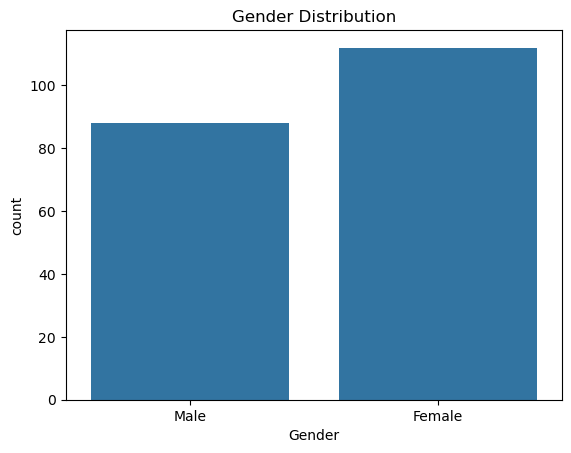

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [136]:
#Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

df['Gender'].value_counts(normalize=True) * 100

56% of the customers are female, and 44% are male.

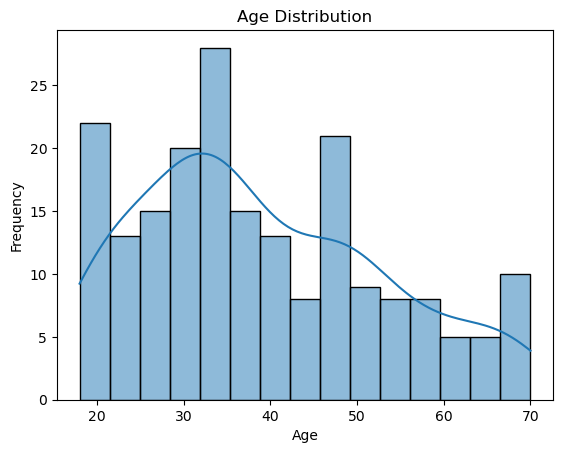

In [138]:
#Age Distribution
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

1.Most customers are between 25–40 years old

The highest frequency is seen around ages 30–35

Indicates that your core customer base is young to early middle-aged adults

2.Secondary peak around 45–50 years

Suggests a second valuable segment of middle-aged shoppers

3.Fewer customers aged 60+

Senior customers are a minority in this mall's customer base

4.Distribution is slightly right-skewed

Slightly more younger customers than older ones



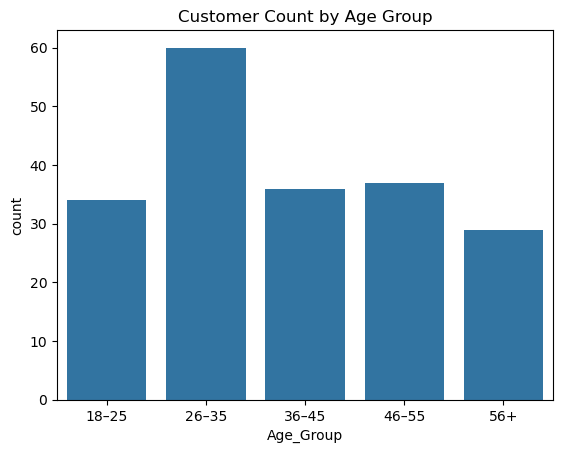

In [140]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70], 
                         labels=['18–25', '26–35', '36–45', '46–55', '56+'])

sns.countplot(data=df, x='Age_Group')
plt.title("Customer Count by Age Group")
plt.show()

Young customers around age 26-35 is more than any other age group

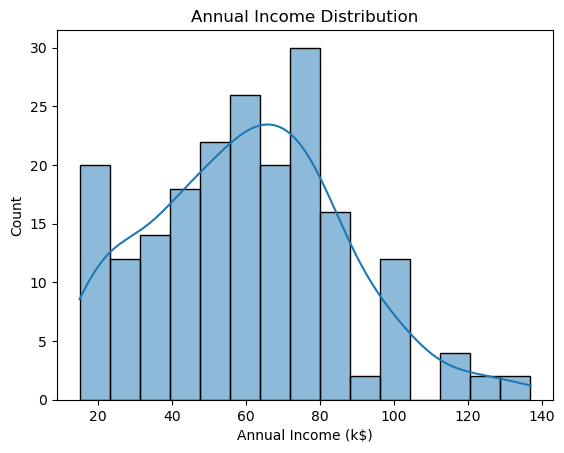

In [142]:
#Annual income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15)
plt.title('Annual Income Distribution')
plt.show()

1.Most Customers Earn Between 40k–80k. 

The peak lies around 60k–75k k$ annual income.

This income bracket dominates customer base.

2.Right-Skewed Distribution. 

There are a few high-income customers (>100k). 

These are likely premium buyers, but they’re a minority.

3.Some Low-Income Shoppers 

(<40k)— could represent bargain-focused segments.



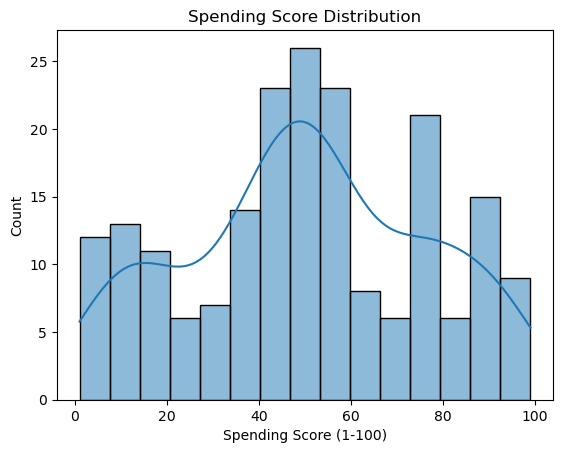

In [144]:
#Spending score distribution
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True)
plt.title('Spending Score Distribution')
plt.show()

Insights:

Bimodal Distribution

There are two prominent peaks — one near low spending scores (0–30) and another around high spending scores (70–90). This suggests two major behavioral groups:

Frugal customers

High-value spenders

Sparse Mid-Range (40–60)

The middle range is less populated, indicating fewer moderately engaged spenders.

Diverse Spending Behavior

The spread shows customer diversity in spending habits, not directly tied to income (as seen in the correlation heatmap).

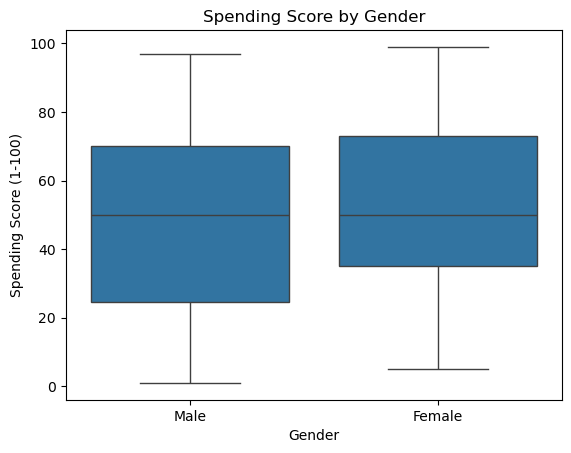

In [146]:
#Spending score by Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')
plt.show()

Similar median spending score for both genders, though females show slightly higher upper range.

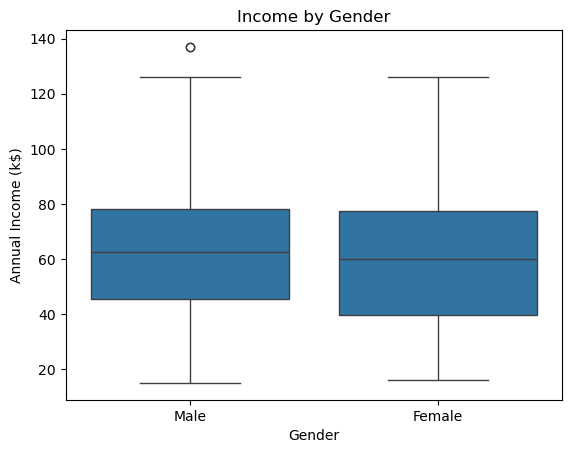

In [148]:
#Income by Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Income by Gender')
plt.show()

Income distribution is similar across genders; no significant inequality.

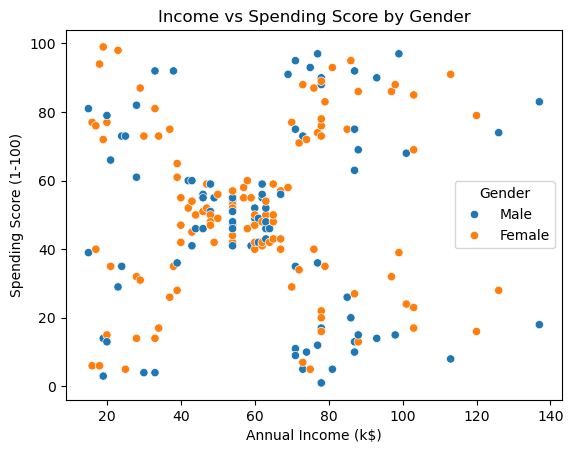

In [150]:
#Annual income vs spending score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Income vs Spending Score by Gender')
plt.show()

High-income customers don’t always have high spending scores.

Several low-income but high-spending individuals present.

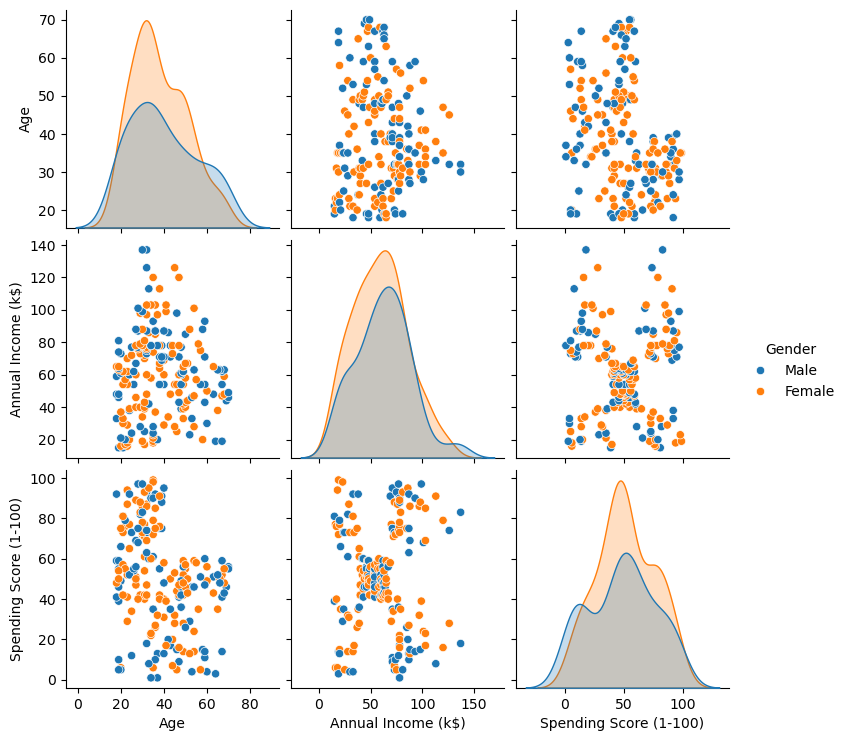

In [152]:
#Variable Relationships Colored by Gender
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')

#Insights from Pairplot (Age, Income, Spending Score by Gender):

##Gender Distribution Differences:

Females (orange) show slightly higher spending scores than males (blue), especially visible in the KDE (diagonal plots).

Females are more concentrated in the younger age groups, while males are more evenly spread across ages.

##Age vs Spending Score:

Younger customers (age 20–40), especially females, tend to have a higher spending score.

Customers over 50 tend to have lower spending scores, regardless of gender.

##Income vs Spending Score:

There is no clear positive or negative correlation between income and spending score.

Some high-income customers still have low spending scores (especially seen with cluster 3 in clustering step), indicating wealth doesn't guarantee higher spending.

##Age vs Income:

Younger individuals (20s and early 30s) tend to have a wider income spread, including high-income customers.

Older individuals tend to cluster around mid-range income levels.

<Axes: >

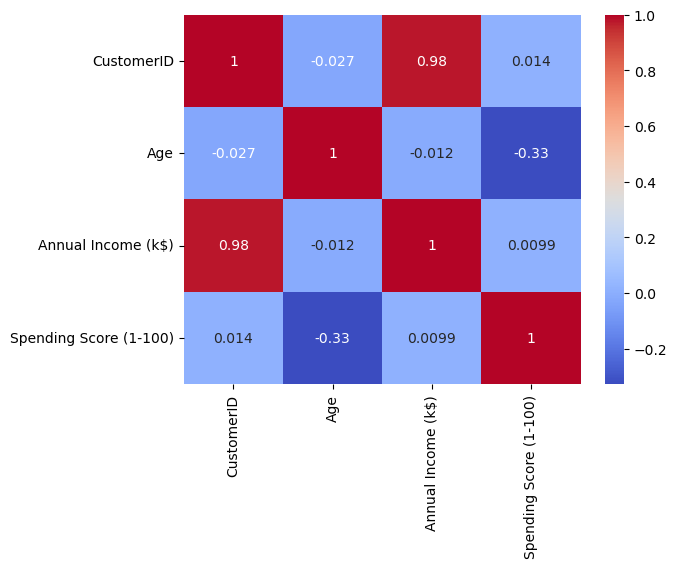

In [154]:
#Heatmap for correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


#Age vs Spending Score → -0.33

This is the strongest correlation in the dataset (moderate negative).

Insight: As age increases, spending score decreases – younger customers tend to spend more.

#Annual Income vs Spending Score → 0.0099

Very weak/no correlation.

Insight: Earning more doesn't mean spending more. Indicates diverse spending behavior across income levels.

#Age vs Annual Income → -0.012

No meaningful correlation.

Suggests customers of various ages earn across a wide income range.

#CustomerID Correlations

Ignore these (especially the 0.98 correlation with income) – likely due to how the data was generated or indexed, not meaningful for analysis.



Key Takeaways:

Age is a valuable predictor of spending behavior.

Income is not a reliable standalone indicator for targeting high-spending customers.

Focus marketing on younger segments and consider clustering to capture behavior-driven segments beyond income.

Text(0.5, 1.0, 'Age vs Annual Income')

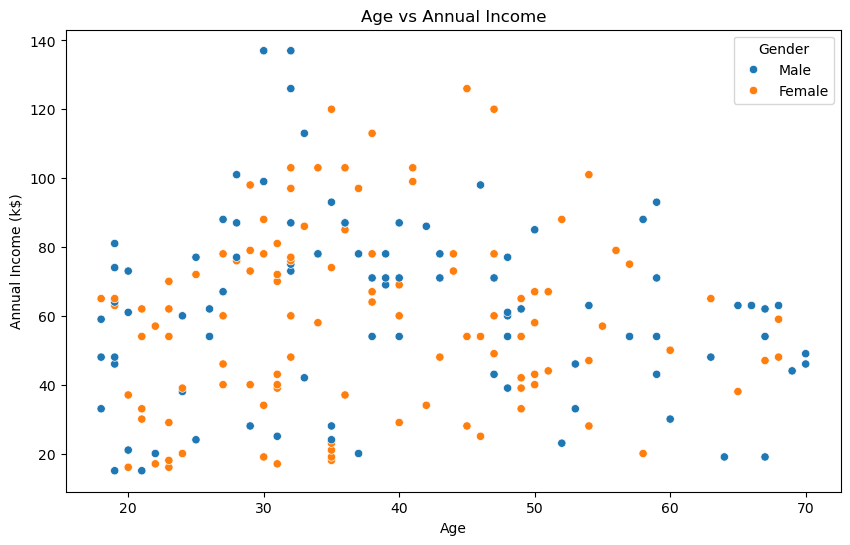

In [157]:
#Age vs Annual income
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Age vs Annual Income')

Income scattered across ages.


Text(0.5, 1.0, 'Age vs Spending Score')

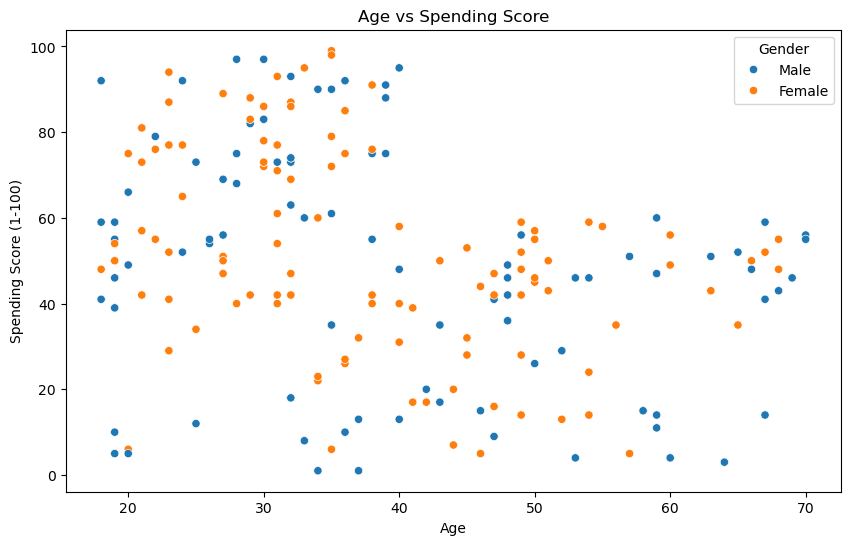

In [159]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score')

Younger customers show higher and more varied spending, while older ones are more conservative.

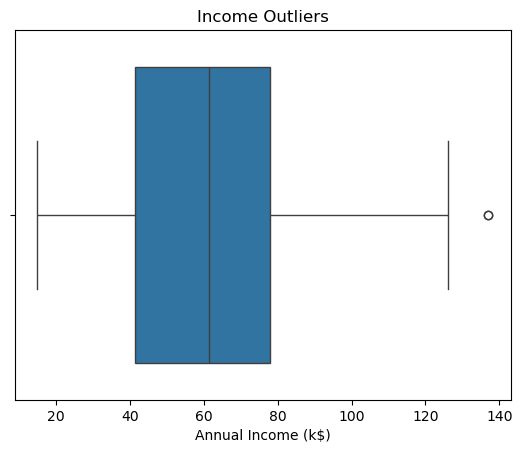

In [161]:
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Income Outliers')
plt.show()

One income outlier >130k (likely legit high-net-worth).

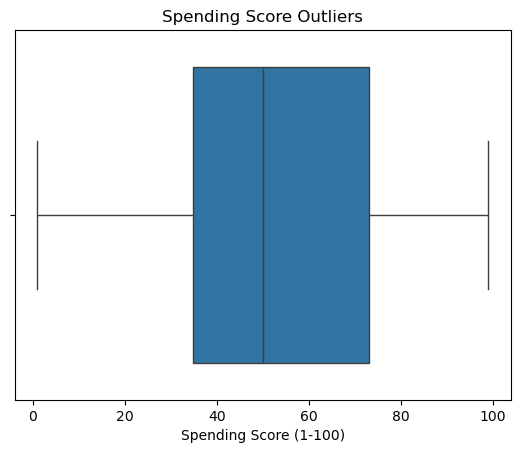

In [163]:
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score Outliers')
plt.show()

No major outliers in spending

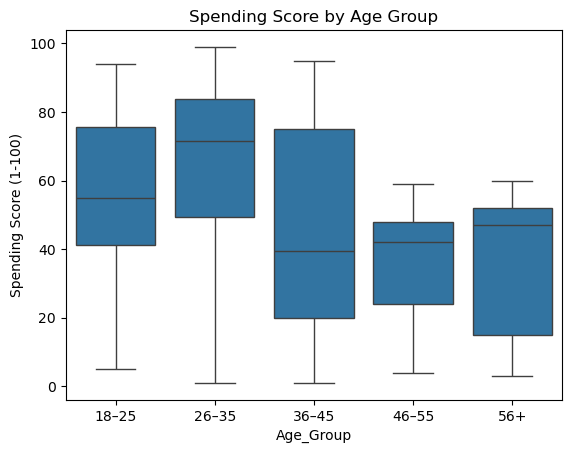

In [165]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70], 
                         labels=['18–25', '26–35', '36–45', '46–55', '56+'])

sns.boxplot(x='Age_Group', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Age Group')
plt.show()

Highest spenders are aged 18–35.

Spending drops with age, especially after 45.


Main Business Impacts from EDA

1. Target Audience Identified: Age 18–35
Customers aged 18–35 have the highest spending scores.

They represent the most profitable and responsive group.

Business Action: Focus marketing campaigns, loyalty programs, and product recommendations on this age group to maximize revenue.

2.Income is not equal to Spending → Behavior > Demographics

No strong correlation between annual income and spending score.

Even low and mid-income groups include high spenders.

Business Action: Use behavioral segmentation (e.g., spending habits) rather than just income level for personalized marketing.

3. Females Spend Slightly More

Boxplots show females have a slightly higher upper range of spending scores.

Income distribution is nearly the same across genders.

Business Action: Create slightly more female-oriented campaigns or offers to boost ROI, while keeping products gender-neutral overall.

4.  Spending Decreases with Age

Customers above age 45 show lower spending scores.

The 46+ segment is more conservative in purchases.

Business Action: Target older customers with value deals, senior discounts, or comfort-based services to retain them.

5. Data is Suitable for Clustering

Pair plots and scatterplots show distinct clusters forming naturally in spending vs income and age vs spend.

Outlier check confirms the data is clean (only one major outlier).


6. Core Segment: Mid-Income, Mid-to-High Spenders

Most customers earn 60k–80k and spend moderately to high.

This group represents a volume + value segment.

Business Action: Focus mass marketing efforts on this segment with bundle offers or product upgrades.

# Clustering: KMeans & Silhouette



In [169]:
#step 1: Feature selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [170]:
#Step 2: Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Why k-means?

We need to group customers based on similarity (in terms of Age, Income, and Spending Score), but:

We had no labels (i.e., unsupervised learning).

The goal was to identify hidden patterns or behaviors (e.g., high-spenders, value-shoppers).
 
K-Means is ideal for this kind of customer segmentation.

C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

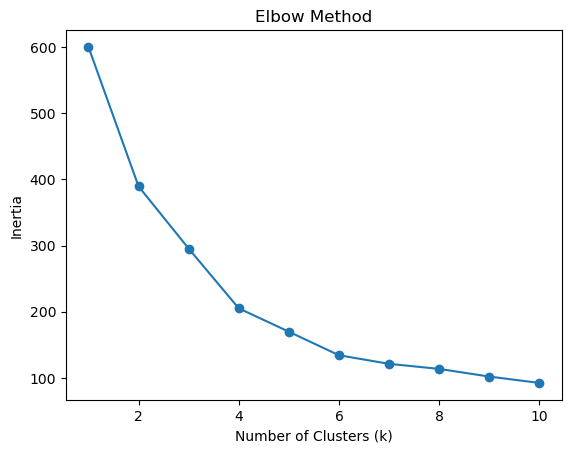

In [172]:
#Step 3: Find Optimal Number of Clusters (Elbow Method)
#Use the elbow method to determine the best number of clusters k.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The elbow appears to be at k=3 or k=4
After k=4, the reduction in inertia is less significant, indicating diminishing returns

In [174]:
#Step 4: Apply K-Means Clustering
from sklearn.metrics import silhouette_score
for k in [3,4]:
    kmeans=KMeans(n_clusters=k,random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
score= silhouette_score(X_scaled,df['Cluster'])
print(f"Silhouette Score for k={k}:{score:.4f}")

k=3
kmeans=KMeans(n_clusters=k,random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
score= silhouette_score(X_scaled,df['Cluster'])
print(f"Silhouette Score for k={k}:{score:.4f}")

Silhouette Score for k=4:0.4040
Silhouette Score for k=3:0.3579


C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [175]:
#Fit the Final KMeans Model


kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Shree\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


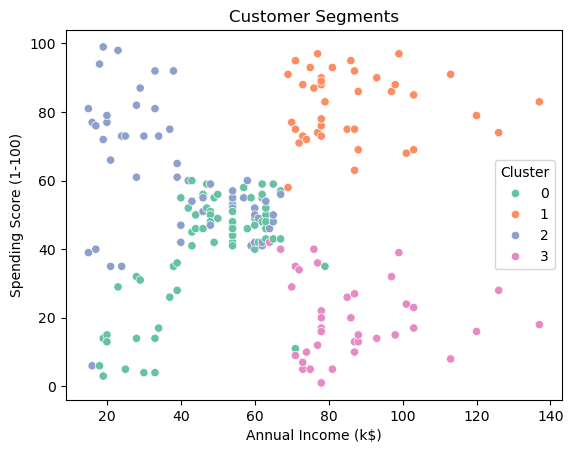

In [176]:
#Visualize the Clusters


sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()

# PCA: Visualizing Clusters

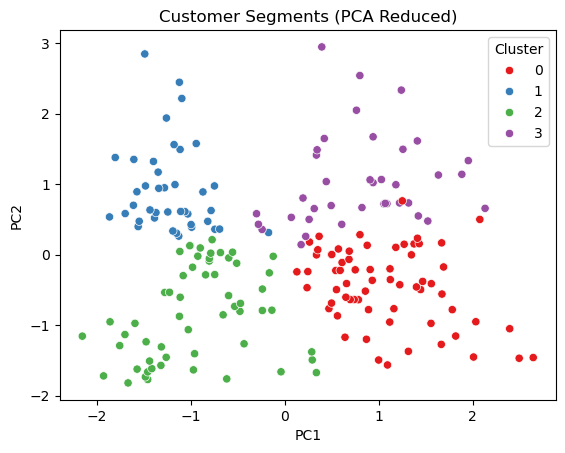

In [178]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (PCA Reduced)')
plt.show()

In [179]:
#Analyze Cluster Profiles

df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.98,47.71,39.97
1,32.88,86.10,81.53
2,25.44,40.00,60.30
3,39.37,86.50,19.58


# Key Insights


Cluster=0, Avg Age=54.0, Avg Income (k$)=47.7, Spending Score=40.0	

Segment Profile=Older customers, moderate income, moderate spending	

Strategic Action=Offer value-for-money bundles and senior loyalty benefits

Cluster=1, Avg Age=32.9, Avg Income (k$)=86.1, Spending Score=81.5

Segment Profile=Young professionals, high income, high spenders	

Strategic Action=Premium product targeting, VIP loyalty, exclusive campaigns

Cluster=2, Avg Age=25.4, Avg Income (k$)=40.0, Spending Score=60.3	

Segment Profile=Students/young shoppers, low income, enthusiastic spenders	

Strategic Action=Discounts, influencer-led campaigns, budget segment focus

Cluster=3, Avg Age=39.4, Avg Income (k$)=	86.5, Spending Score=19.6	

Segment Profile= High-income but low-engagement professionals	

Strategic Action=Upsell/cross-sell campaigns, retarget with tailored offers


Cluster 1 is your most valuable segment → maximize revenue through personalized premium marketing.

Cluster 3 has untapped potential → high income but low engagement; reactivate with email/push campaigns.

Cluster 2 has good spending tendencies for their income level → reach them with discount-focused ads, high ROI.

Cluster 0 is stable but not growth-oriented → retain through basic loyalty plans.



# Business Impact Calculation

In [184]:
cluster_labels = {
    0: 'Older Mid-Spenders',
    1: 'Young Premium Spenders',
    2: 'Young Value Shoppers',
    3: 'Rich Low Spenders'
}
df['Segment'] = df['Cluster'].map(cluster_labels)

In [185]:
# Estimating revenue proxy as count * avg spending score
for i in df['Cluster'].unique():
    size = df[df['Cluster']==i].shape[0]
    spend_score = df[df['Cluster']==i]['Spending Score (1-100)'].mean()
    print(f"Cluster {i} → Revenue Index: {round(size * spend_score)}")

Cluster 2 → Revenue Index: 3437
Cluster 0 → Revenue Index: 2598
Cluster 3 → Revenue Index: 744
Cluster 1 → Revenue Index: 3261


Insights from Revenue Index

#Highest Potential Segment: Cluster 2

While their spending score is not the highest, their large count drives total revenue.

These are value-conscious shoppers, ideal for discount campaigns.

#High-Value Niche: Cluster 1

Fewer customers, but very high spending score.

Ideal for premium targeting, personalized marketing, and loyalty rewards.

#Re-engagement Opportunity: Cluster 3

High-income customers spending very little.

With the right strategy, even a 10% behavior change could result in substantial uplift.

#Stable Segment: Cluster 0

Older customers with moderate spend.

Focus on retention and brand loyalty strategies.

# Cluster Summary

In [188]:
cluster_summary = df.groupby('Segment')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'count']).round(1)
cluster_summary

Age       Annual Income (k$)        \
                        mean count               mean count   
Segment                                                       
Older Mid-Spenders      54.0    65               47.7    65   
Rich Low Spenders       39.4    38               86.5    38   
Young Premium Spenders  32.9    40               86.1    40   
Young Value Shoppers    25.4    57               40.0    57   

                       Spending Score (1-100)        
                                         mean count  
Segment                                              
Older Mid-Spenders                       40.0    65  
Rich Low Spenders                        19.6    38  
Young Premium Spenders                   81.5    40  
Young Value Shoppers                     60.3    57

# Exporting clean clustered dataset

In [190]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Group,Cluster,PC1,PC2,Segment
0,1,Male,19,15,39,18–25,2,-0.615720,-1.763481,Young Value Shoppers
1,2,Male,21,15,81,18–25,2,-1.665793,-1.820747,Young Value Shoppers
2,3,Female,20,16,6,18–25,2,0.337862,-1.674799,Young Value Shoppers
3,4,Female,23,16,77,18–25,2,-1.456573,-1.772430,Young Value Shoppers
4,5,Female,31,17,40,26–35,2,-0.038465,-1.662740,Young Value Shoppers
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,26–35,1,-1.093705,2.215577,Young Premium Spenders
196,197,Female,45,126,28,36–45,3,0.800448,2.540748,Rich Low Spenders
197,198,Male,32,126,74,26–35,1,-1.119709,2.445169,Young Premium Spenders
198,199,Male,32,137,18,26–35,3,0.395411,2.946665,Rich Low Spenders


In [191]:
df.drop(['PC1', 'PC2'], axis=1, inplace=True)

In [192]:
df.to_csv("final_customer_segments.csv", index=False)